In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Problem 2.
# Linear Basis Function Regression
# import data and plot
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P2/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

In [7]:
# define variables
X = getData(ifPlotData = False)[0]
Y = getData(ifPlotData = False)[1]

In [29]:
# define polyx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polyx(Xplot, degree):
    len = Xplot.shape[1]
    if degree in range(0,1):
        Xnew = np.ones((len,1))
        return Xnew
    elif degree in range(1,2):
        Xnew = np.hstack((np.ones((len, 1)), Xplot.T))
        return Xnew
    else:
        Xnew = np.hstack((np.ones((len, 1)), Xplot.T))
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, Xplot.T**i))
            i += 1
            
        return Xnew

In [ ]:
# 2.1. Polynomial Fit
# Note: code for fits is the same, change m only
# m = 0
m = 0
Xplot = np.array(np.linspace(0,1,num = 110)).T[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m).T[::-1])
Yactual = np.cos(math.pi*Xplot) + np.cos(2*math.pi*Xplot)

#fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(Xplot.T, Yplot, '-')
plt.plot(Xplot.T, Yactual.T, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.title("Linear Regression (M = %s)" %(m))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([-2,3])
plt.show()
#fig.savefig('2.1 poly %s.jpg' %(m))

In [ ]:
# 2.3 Define batch grad descent function for polynomial:
def calcCostpoly(X, Y, thetas, m):
	n = X.shape[0] #number of training examples
	total_cost = 0
	for i in xrange(n): 
		X_i = X[i][np.newaxis]
		Y_i = Y[i]
		added_cost = sum(np.power((np.dot(polyx(X[np.newaxis], m), thetas) - Y_i), 2))
		total_cost = total_cost + added_cost
	return total_cost

In [ ]:
# define polyx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polyxsgd(Xplot, degree):
    if degree in range(0,1):
        Xnew = 1
        return Xnew
    elif degree in range(1,2):
        Xnew = np.hstack((1, Xplot))
        return Xnew
    else:
        Xnew = np.hstack((1, Xplot))
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, Xplot**i))
            
        return Xnew

In [75]:
def GDpoly(w, X, Y, m, thresh, alpha):
	n = X.shape[0] #number of training examples
	n_iter = 1000000 # number of iterations  
	thetas = w#(w+20)[np.newaxis].T# initial guesses
	prev_cost = calcCostpoly(X,Y,thetas, m) #initial cost before SGD begins
	#print "Initial Cost: %0.3f" %prev_cost
	for iteration in xrange(n_iter): #for each iteration
		grad = np.dot(polyx(X[np.newaxis], m).T,(Y - np.dot(polyx(X[np.newaxis], m), thetas)))
  		thetas = thetas + (alpha*grad) 
  		curr_cost = calcCostpoly(X, Y, thetas, m)
  		#print ("cost: %0.3f" %curr_cost)
  		#print thetas
  		if abs(curr_cost - prev_cost) <= thresh:
  			print('SUCCESS')
  			return (iteration, (iteration+1)*n, curr_cost, thetas)
  		prev_cost = curr_cost
	print("Did Not Converge")
	return (iteration, (iteration+1)*n, curr_cost, thetas)

In [40]:
#grad = np.dot(X.T,(Y[np.newaxis].T- np.dot(X, thetas)))
m = 3
w=np.polyfit(X, Y, m)[::-1]
np.dot(polyx(X[np.newaxis], m), w).shape
Y.shape
np.dot(polyx(X[np.newaxis], m).T,(Y - np.dot(polyx(X[np.newaxis], m), w)))

array([  1.50435220e-14,   6.03683770e-15,   2.49800181e-15,
         7.21644966e-16])

In [77]:
#works
m = 1
iterations1 = []
w=np.polyfit(X, Y, m)[::-1]

GDpoly(w+2, X, Y, m, 1e-4, 1e-3)

SUCCESS


(6459, 71060, 187.89582635215845, array([ 0.90411133, -1.81019301]))

In [82]:
import random
def SGDpoly(w, X, Y, m, thresh, step):
    n = X.shape[0] #number of training examples
    n_iter = 100000#100000 # number of iterations  
    thetas = w#(w+20)[np.newaxis].T# initial guesses
    prev_cost = calcCostpoly(X,Y,thetas, m) #initial cost before SGD begins
    #print "Initial Cost: %0.3f" %prev_cost
    total_iter = 0
    for iteration in xrange(n_iter): #for each iteration
        alpha = ((iteration+1)+step**(-1))**(-0.95) #learning rate #-0.8 
        #print "iteration: %d" %iteration
        train_order = range(n)
        random.shuffle(train_order)
        for j in xrange(n): #for each training example 
            i = train_order[j]
            X_i = X[i][np.newaxis]
            Y_i = Y[i]
            temp = 2*(Y_i - np.dot(polyxsgd(X_i, m)[np.newaxis], thetas))
            thetas = (thetas.T + (alpha*temp*polyxsgd(X_i, m))).T #
            total_iter += 1

        curr_cost = calcCostpoly(X, Y, thetas, m)
        #print "cost: %0.3f" %curr_cost
        #if np.power((sum((Y - np.ndarray.flatten(np.dot(X, thetas)))))**2, 0.5) <= thresh:
        if abs(curr_cost - prev_cost) <= thresh:
            print('SUCCESS')
            return (iteration, total_iter, curr_cost, thetas)
        prev_cost = curr_cost
    print("Did Not Converge")
    return (iteration, total_iter, curr_cost, thetas)

In [251]:
# SGD
# generate data for var init wts:
m = 1
iterations1 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 30, 60, 100]:
    iterations1.append(SGDpoly(w+i, X, Y, m, 0.5, 0.1)[1])
m = 3
iterations3 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 30, 60, 100]:
    iterations3.append(SGDpoly(w+i, X, Y, m, 0.5, 0.1)[1])
m = 6
iterations6 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 30, 60, 100]:
    iterations6.append(SGDpoly(w+i, X, Y, m, 0.5, 0.1)[1])

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


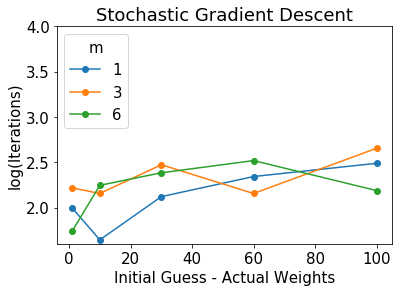

In [399]:
plt.rcParams.update({'font.size': 15})

# SGD - plot var init weights
x = [1, 10, 30, 60, 100]

#fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot((x), np.log10(iterations1), 'o-', label = '1')
plt.plot((x), np.log10(iterations3), 'o-', label = '3')
plt.plot((x), np.log10(iterations6), 'o-', label = '6')
plt.ylim(1.6, 4)
plt.xlabel('Initial Guess - Actual Weights')
plt.ylabel('log(Iterations)')
plt.legend(loc='upper left', title = 'm')
plt.title('Stochastic Gradient Descent')
plt.show()
#fig.savefig('var_init_wts_sgd.jpg', bbox_inches='tight')

In [253]:
# Batch
# generate data for var init wts:
m = 1
iterations1b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 30, 60, 100]:
    iterations1b.append(GDpoly(w+i, X, Y, m, 0.5, 0.1)[1])
m = 3
iterations3b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 30, 60, 100]:
    iterations3b.append(GDpoly(w+i, X, Y, m, 0.5, 0.1)[1])
m = 6
iterations6b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1, 10, 30, 60, 100]:
    iterations6b.append(GDpoly(w+i, X, Y, m, 0.5, 0.1)[1])

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [396]:
plt.rcParams.update({'font.size': 15})

# plot var init weights batch
x = [1, 10, 30, 60, 100]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot((x), np.log10(iterations1b), 'o-', label = '1')
plt.plot((x),np.log10(iterations3b), 'o-', label = '3')
plt.plot((x), np.log10(iterations6b), 'o-', label = '6')
plt.ylim(1.6, 4)
plt.xlabel('Initial Guess - Actual Weights')
plt.ylabel('log(Iterations)')
plt.legend(loc='upper left', title = 'm')
plt.title('Batch Gradient Descent')
fig.savefig('var_init_wts_batch_corr.jpg', bbox_inches='tight')

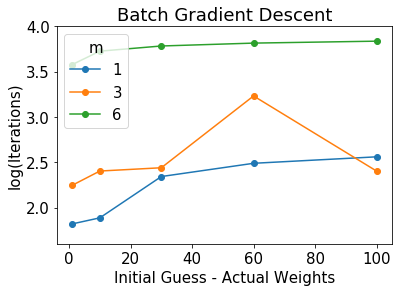

In [259]:
#notes SGD easier convergence, less sensitive to poly degree

In [273]:
# SGD: generate data for var step size:
m = 1
iterations1ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations1ss.append(SGDpoly(w+1, X, Y, m, 0.5, i)[1])
m = 3
iterations3ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations3ss.append(SGDpoly(w+1, X, Y, m, 0.5, i)[1])
m = 6
iterations6ss = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations6ss.append(SGDpoly(w+1, X, Y, m, 0.5, i)[1])

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [400]:
plt.rcParams.update({'font.size': 15})

# SGD: plot var step size
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), np.log10(iterations1ss), 'o-', label = '1')
plt.plot(np.log10(x), np.log10(iterations3ss), 'o-', label = '3')
plt.plot(np.log10(x), np.log10(iterations6ss), 'o-', label = '6')
plt.ylim(1.5, 4)
plt.xlabel('log(Step Size)')
plt.ylabel('Log(Iterations)')
plt.legend(loc='upper left', title = 'm')
plt.title('Stochastic Gradient Descent')
fig.savefig('var_step size sgd.jpg', bbox_inches='tight')

In [276]:
# Batch: generate data for var step size:
m = 1
iterations1ssb = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations1ssb.append(GDpoly(w+1, X, Y, m, 0.5, i)[1])
m = 3
iterations3ssb = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations3ssb.append(GDpoly(w+1, X, Y, m, 0.5, i)[1])
m = 6
iterations6ssb = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-4, 1e-3, 1e-2, 1e-1]:
    iterations6ssb.append(GDpoly(w+1, X, Y, m, 0.5, i)[1])

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [401]:
plt.rcParams.update({'font.size': 15})

# Batch: plot var step size
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), np.log10(iterations1ssb), 'o-', label = '1')
plt.plot(np.log10(x), np.log10(iterations3ssb), 'o-', label = '3')
plt.plot(np.log10(x), np.log10(iterations6ssb), 'o-', label = '6')
plt.ylim(1.5, 4)
plt.xlabel('log(Step Size)')
plt.ylabel('Log(Iterations)')
plt.legend(loc='upper left', title = 'm')
plt.title('Batch Gradient Descent')
fig.savefig('corr var_step size batch.jpg', bbox_inches='tight')

In [ ]:
# notes: SGD does have U shape but not until higher step size - having an overshoot seems to hurt batch more, prob bc sgd is also lowering its step size with iterations
# SGD usually lower iterations than batch

In [383]:
# SGD: generate data for var convergence crit:
m = 1
iterations1cc = []
west = []
avgdeltaw1 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-3, 1e-2, 1e-1, 1]:
    iterations1cc.append(SGDpoly(w+1, X, Y, m, i, 0.1)[1])
    west.append(SGDpoly(w+1, X, Y, m, i, 0.1)[3])
    avgdeltaw1.append(np.mean(abs(west-w)))

m = 3
iterations3cc = []
west = []
avgdeltaw3 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-3, 1e-2, 1e-1, 1]:
    iterations3cc.append(SGDpoly(w+1, X, Y, m, i, 0.1)[1])
    west.append(SGDpoly(w+1, X, Y, m, i, 0.1)[3])
    avgdeltaw3.append(np.mean(abs(west-w)))

m = 6
iterations6cc = []
west = []
avgdeltaw6 = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-3, 1e-2, 1e-1, 1]:
    iterations6cc.append(SGDpoly(w+1, X, Y, m, i, 0.1)[1])
    west.append(SGDpoly(w+1, X, Y, m, i, 0.1)[3])
    avgdeltaw6.append(np.mean(abs(west-w)))

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [402]:
plt.rcParams.update({'font.size': 15})

# SGD: plot var convergence crit:
x = [1e-3, 1e-2, 1e-1, 1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), (iterations1cc), 'ro-', label = '1')
plt.plot(np.log10(x), (iterations3cc), 'go-', label = '3')
plt.plot(np.log10(x), (iterations6cc), 'bo-', label = '6')
plt.xlabel('log(Convergence Criterion)')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
plt.title('Stochastic Gradient Descent')
plt.ylim(0, 8200)
fig.savefig('var_cc_iter_sgd.jpg', bbox_inches='tight')

In [386]:
# Batch: generate data for var convergence crit:
m = 1
iterations1ccb = []
west = []
avgdeltaw1b = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-3, 1e-2, 1e-1, 1]:
    iterations1ccb.append(GDpoly(w+1, X, Y, m, i, 0.1)[1])
    west.append(GDpoly(w+1, X, Y, m, i, 0.1)[3])
    avgdeltaw1b.append(np.mean(abs(west-w)))

m = 3
iterations3ccb = []
avgdeltaw3b  = []
west = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-3, 1e-2, 1e-1, 1]:
    iterations3ccb.append(SGDpoly(w+1, X, Y, m, i, 0.1)[1])
    west.append(GDpoly(w+1, X, Y, m, i, 0.1)[3])
    avgdeltaw3b.append(np.mean(abs(west-w)))

m = 6
iterations6ccb = []
avgdeltaw6b = []
west = []
w=np.polyfit(X, Y, m)[::-1]
for i in [1e-3, 1e-2, 1e-1, 1]:
    iterations6ccb.append(GDpoly(w+1, X, Y, m, i, 0.1)[1])
    west.append(GDpoly(w+1, X, Y, m, i, 0.1)[3])
    avgdeltaw6b.append(np.mean(abs(west-w)))

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [403]:
plt.rcParams.update({'font.size': 15})

# Batch: plot var convergence crit:
x = [1e-3, 1e-2, 1e-1, 1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), (iterations1ccb), 'ro-', label = '1')
plt.plot(np.log10(x), (iterations3ccb), 'go-', label = '3')
plt.plot(np.log10(x), (iterations6ccb), 'bo-', label = '6')
plt.xlabel('log(Convergence Criterion)')
plt.ylabel('Iterations')
plt.legend(loc='upper left', title = 'm')
plt.title('Batch Gradient Descent')
plt.ylim(0, 8200)
fig.savefig('var_cc_iter_batch.jpg', bbox_inches='tight')

In [404]:
plt.rcParams.update({'font.size': 15})

# SGD: plot var convergence error:
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), np.log10(avgdeltaw1), 'ro--', label = '1')
plt.plot(np.log10(x), np.log10(avgdeltaw3), 'go--', label = '3')
plt.plot(np.log10(x), np.log10(avgdeltaw6), 'bo--', label = '6')

plt.xlabel('log(Convergence Criterion)')
plt.ylabel('log(Average Weight Error)')
plt.title('Stochastic Gradient Descent')
plt.legend(loc='upper left', title = 'm')
plt.ylim(-3.9, -1.2)
fig.savefig('var_cc_error_sgd.jpg', bbox_inches='tight')

In [405]:
plt.rcParams.update({'font.size': 15})

# Batch: plot var convergence error:
x = [1e-4, 1e-3, 1e-2, 1e-1]

fig = plt.figure(figsize=(5,5), dpi=300)
plt.plot(np.log10(x), np.log10(avgdeltaw1b), 'ro--', label = '1')
plt.plot(np.log10(x), np.log10(avgdeltaw3b), 'go--', label = '3')
plt.plot(np.log10(x), np.log10(avgdeltaw6b), 'bo--', label = '6')

plt.xlabel('log(Convergence Criterion)')
plt.ylabel('log(Average Weight Error)')
plt.title('Batch Gradient Descent')
plt.legend(loc='upper left', title = 'm')
plt.ylim(-3.9, -1.2)
fig.savefig('var_cc_error_batch.jpg', bbox_inches='tight')

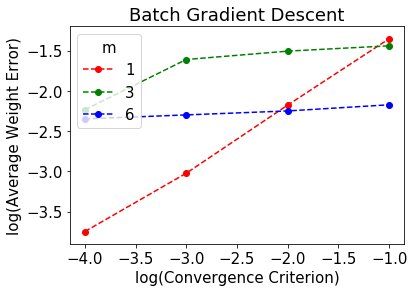

In [395]:
#note batch error generally smaller than sgd